In [1]:
import yaml
import pandas as pd
from utils.data_preprocessor import DataPreprocessor

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

testing_file_path: str = "../data/indicators (1min)/NVDA_indicators.csv"
test_df: pd.DataFrame = pd.read_csv(testing_file_path)

test_processor = DataPreprocessor(test_df)

X_test = test_processor.X_testing_scaled
y_test = test_processor.y_batched

print("Testing Dataset shape:", test_df.shape)
print("Testing Dataset as time series batches:",X_test.shape, y_test.shape)


Testing Dataset shape: (5000, 13)
Testing Dataset as time series batches: (4970, 20, 21) (4970,)


In [2]:
from sklearn.metrics import classification_report
from keras.models import load_model
from utils.model_evaluator import ModelEvaluator

model_path: str = "../models/saved models/trained_StockTrendLSTM_model.keras"
model = load_model(model_path)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

classification_report_output = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_report_output)

model_evaluator = ModelEvaluator(test_loss, y_test, y_pred)
metrics_df = model_evaluator.evaluation_metrics
metrics_df

156/156 [==============================] - 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00      2595

    accuracy                           1.00      4970
   macro avg       1.00      1.00      1.00      4970
weighted avg       1.00      1.00      1.00      4970



,Metric,Score
0,Loss,0.00989
1,Accuracy,1.00000
2,Precision,1.00000
3,Recall,1.00000
4,F1Score,1.00000
5,ROC AUC,1.00000


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten(), 'Predicted_Prob': y_pred_prob.flatten()})
results_df

,Actual,Predicted,Predicted_Prob
0,1,1,0.999935
1,1,1,0.999948
2,1,1,0.999955
3,0,0,0.006942
4,0,0,0.000338
5,0,0,0.000173
6,0,0,0.000099
7,0,0,0.000118
8,0,0,0.000092
9,0,0,0.000078


In [4]:
test_processor.target_data[["open", "open-change", "open-trend", "target"]]


,open,open-change,open-trend,target
datetime,,,,
2023-12-08 15:28:00,475.24,-0.12,0,0
2023-12-08 15:29:00,475.38,0.11,1,0
2023-12-08 15:30:00,475.10,0.04,1,1
2023-12-08 15:31:00,475.21,0.37,1,0
2023-12-08 15:32:00,475.28,0.23,1,0
2023-12-08 15:33:00,475.24,0.35,1,0
2023-12-08 15:34:00,475.06,0.14,1,0
2023-12-08 15:35:00,475.04,0.09,1,0
2023-12-08 15:36:00,475.02,0.20,1,0


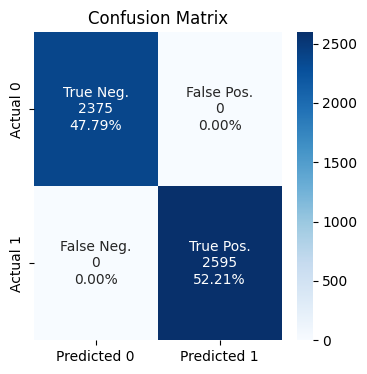

In [5]:
from utils.visualizing_service import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred)

In [6]:
from utils.visualizing_service import plot_correlation_heatmap
# plot_correlation_heatmap(test_processor.target_data)
